In [16]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression


In [2]:
df_train = pd.read_csv("train.csv", index_col="Id", na_values="NA")
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_train.shape

(1460, 80)

In [5]:
df_train.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,5,NaN,NaN,2,2,4,4,2,5,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [6]:
df_train.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [7]:
df_test = pd.read_csv("test.csv", index_col="Id", na_values="NA")

In [8]:
df_test.describe(include='all')

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,1459,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,5,NaN,NaN,2,2,4,4,1,5,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,1114,NaN,NaN,1453,70,934,1311,1457,1081,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


In [9]:
df = df_train.append(df_test)

E:\Python\Anaconda\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [10]:
df.drop("SalePrice", axis=1, inplace=True)

#### Feature Engineering

In [11]:
# helper method to obtain all numerical/categorical features of a data frame
def get_features(df, feature_type):
    if feature_type == "num":
        return list(df.select_dtypes(include=["float", "int"]).columns)
    elif feature_type == "cat":
        return list(df.select_dtypes(include=["object"]).columns)
    else:
        raise ValueError("feature_type must be 'num' (numerical) or 'cat' (categorical).")

In [12]:
num_features = get_features(df, "num")
num_features

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF']

In [13]:
columns_with_na_values = df.columns[df.isnull().any()]
columns_with_na_values

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [14]:
num_features_without_na = [x for x in num_features if x not in columns_with_na_values]

print("Numerical features without missing values in train.csv and test.csv:")
print(num_features_without_na)

Numerical features without missing values in train.csv and test.csv:
[]


#### Visualization

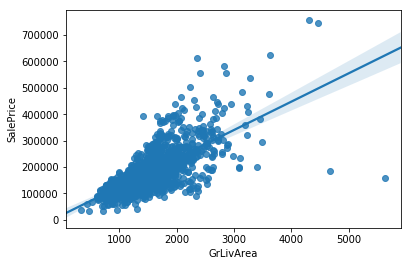

In [15]:
sns.regplot(x="GrLivArea", y="SalePrice", data=df_train)

In [17]:
# helper method to compute the root mean squared error
def root_mean_squared_error(model, X, y_true):
    y_predict = model.predict(X)    
    return np.sqrt(mean_squared_error(y_predict, y_true))

In [18]:
# Helper method to check performance of a model on 4 different sized training data sets.
def model_eval_helper(features, model):
    X = df_train[features].values
    y = np.ravel(df_train[["SalePrice"]].apply(np.log).values)
    n = len(df_train)

    X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

    for train_size in np.linspace(0.1, 1, num=4):
        last = int(n * train_size)
        model.fit(X_train[:last], y_train[:last])
        score_out = root_mean_squared_error(model, X_val, y_val)
        score_in = root_mean_squared_error(model, X_train[:last], y_train[:last])
        print("")
        print("Using {} samples ({}%) of train.csv for training.".format(last, train_size * 100))
        print("Root mean squared logs error on validation data: {}".format(score_out))
        print("Root mean squared logs error on training data: {}".format(score_in))

In [19]:
print("Training linear regression model with feature 'GrLivArea'.")
model_eval_helper(["GrLivArea"], LinearRegression())

Training linear regression model with feature 'GrLivArea'.

Using 146 samples (10.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.3028858664128743
Root mean squared logs error on training data: 0.2794689302974711

Using 584 samples (40.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.2999880983864968
Root mean squared logs error on training data: 0.2952481495212029

Using 1021 samples (70.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.2980314492258208
Root mean squared logs error on training data: 0.2872536837112501

Using 1460 samples (100.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.2983119956064838
Root mean squared logs error on training data: 0.28172663993789415


In [21]:
# helper function to display correlation matrices
def corr_helper(features=None, min_corr=0, max_corr=1, draw=True):
    if not features:
        features = list(df_train.columns.values)
    
    if "SalePrice" in features:
        features.remove("SalePrice")
    
    corr = pd.DataFrame(df_train[["SalePrice"] + features].corr())
    corr = corr[(corr["SalePrice"].abs() >= min_corr) & (corr["SalePrice"].abs() <= max_corr)]
    selected_features = corr.index.values
    corr = corr[selected_features]

    if draw:
        f, ax = plt.subplots(figsize=(15, 10))
        sns.heatmap(corr, annot=True, fmt=".2f")
        
    selected_features = list(selected_features)
    
    if "SalePrice" in selected_features:
        selected_features.remove("SalePrice")
        
    return selected_features

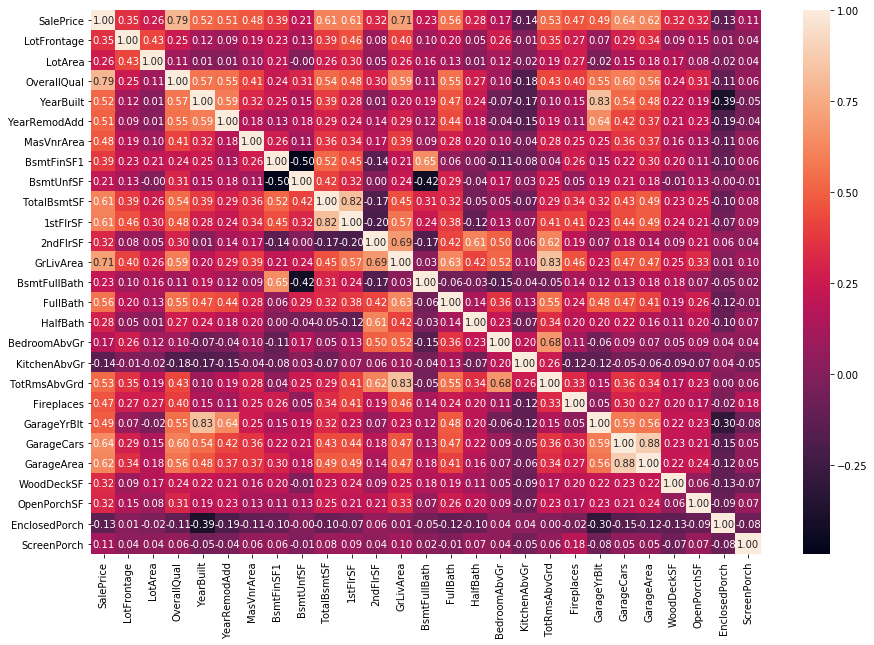

In [22]:
selected_features = corr_helper(features=num_features_without_na, min_corr=0.1)

Only feature 'OverallQual' has a higher correlation to 'SalePrice' than 'GrLivArea'. According to the description, 'OverallQual' rates the overall material and finish of the house. There are other features like '1stFlrSF', '2ndFlrSF' and 'TotRmsAbvGrd' that strongly correlate to the sale price, but they also strongly correlate to 'GrLivArea' - which makes sense.

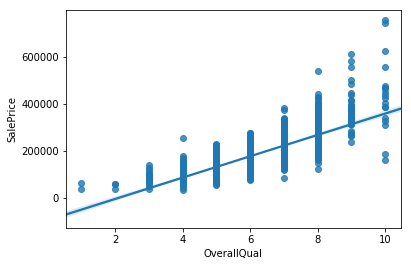

In [23]:
sns.regplot(x="OverallQual", y="SalePrice", data=df_train)

### Imputation

In [25]:
columns_with_na_values = df.columns[df.isnull().any()]
columns_with_na_values

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [26]:
print("{} of {} features have missing values.".format(len(columns_with_na_values), len(df.columns)))
print(df[columns_with_na_values].isnull().sum())

34 of 79 features have missing values.
Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64


In [27]:
cat_features = get_features(df, "cat")
cat_features

['Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities']

In [28]:
none_values = ["Alley", "BsmtQual", "BsmtCond", "FireplaceQu", "Utilities", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageFinish", 
               "Fence", "MiscFeature", "PoolQC", "GarageCond", "GarageQual", "KitchenQual", "MasVnrType"]
none_values

['Alley',
 'BsmtQual',
 'BsmtCond',
 'FireplaceQu',
 'Utilities',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageType',
 'GarageFinish',
 'Fence',
 'MiscFeature',
 'PoolQC',
 'GarageCond',
 'GarageQual',
 'KitchenQual',
 'MasVnrType']

In [29]:
df[none_values] = df[none_values].fillna("None")

In [30]:
cat_features_with_na_values = df[cat_features].columns[df[cat_features].isnull().any()]
cat_features_with_na_values

Index(['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'MSZoning',
       'SaleType'],
      dtype='object')

In [31]:
print("Remaining categorical features with missing values:")
print(df[cat_features_with_na_values].isnull().sum())

Remaining categorical features with missing values:
Electrical     1
Exterior1st    1
Exterior2nd    1
Functional     2
MSZoning       4
SaleType       1
dtype: int64


In [32]:
average_value_map = {"Electrical": "Mix", "Exterior1st": "Other", "Exterior2nd": "Other", "Functional": "Mod", 
                     "MSZoning": "Oth", "SaleType": "Oth"}
average_value_map

{'Electrical': 'Mix',
 'Exterior1st': 'Other',
 'Exterior2nd': 'Other',
 'Functional': 'Mod',
 'MSZoning': 'Oth',
 'SaleType': 'Oth'}

In [33]:
for col, value in average_value_map.items():
    df_train[col] = df_train[col].fillna(value)
    df_test[col] = df_test[col].fillna(value)
    df[col] = df[col].fillna(value)

In [34]:
cat_features_with_na_values = df[cat_features].columns[df[cat_features].isnull().any()]
print("Number of categorical features with missing values: {}".format(len(cat_features_with_na_values)))

Number of categorical features with missing values: 0


In [35]:
num_features = get_features(df, "num")
num_features

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF']

In [36]:
num_features_with_na_values = df[num_features].columns[df[num_features].isnull().any()].values
num_features_with_na_values

array(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtUnfSF', 'GarageArea', 'GarageCars', 'GarageYrBlt',
       'LotFrontage', 'MasVnrArea', 'TotalBsmtSF'], dtype=object)

In [37]:
print("{} of {} numerical features have missing values:".format(len(num_features_with_na_values), len(num_features)))
print(df[num_features_with_na_values].isnull().sum())

11 of 11 numerical features have missing values:
BsmtFinSF1        1
BsmtFinSF2        1
BsmtFullBath      2
BsmtHalfBath      2
BsmtUnfSF         1
GarageArea        1
GarageCars        1
GarageYrBlt     159
LotFrontage     486
MasVnrArea       23
TotalBsmtSF       1
dtype: int64


In [38]:
none_values = ["BsmtFinSF1", "BsmtFinSF2", "BsmtFullBath", "BsmtHalfBath", "BsmtUnfSF", "GarageArea", "GarageCars", 
               "LotFrontage", "MasVnrArea", "TotalBsmtSF"]
none_values

['BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'GarageArea',
 'GarageCars',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF']

In [39]:
df[none_values] = df[none_values].fillna(0)

In [41]:
df[none_values].head()

,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,GarageArea,GarageCars,LotFrontage,MasVnrArea,TotalBsmtSF
Id,,,,,,,,,,
1,706.0,0.0,1.0,0.0,150.0,548.0,2.0,65.0,196.0,856.0
2,978.0,0.0,0.0,1.0,284.0,460.0,2.0,80.0,0.0,1262.0
3,486.0,0.0,1.0,0.0,434.0,608.0,2.0,68.0,162.0,920.0
4,216.0,0.0,1.0,0.0,540.0,642.0,3.0,60.0,0.0,756.0
5,655.0,0.0,1.0,0.0,490.0,836.0,3.0,84.0,350.0,1145.0


In [42]:
num_features_with_na_values = df.columns[df.isnull().any()].values
num_features_with_na_values

array(['GarageYrBlt'], dtype=object)

In [43]:
print("Columns with missing values:")
print(num_features_with_na_values)

Columns with missing values:
['GarageYrBlt']


In [44]:
df.drop("GarageYrBlt", axis=1, inplace=True)
print("Removed feature 'GarageYrBlt'.")

Removed feature 'GarageYrBlt'.


In [45]:
features_with_na_values = df.columns[df.isnull().any()]
print("Number of features with missing values: {}".format(len(features_with_na_values)))

Number of features with missing values: 0


In [48]:
train_size = len(df_train)
train_size

1460

In [49]:
# helper method to update df_train and df_test according to df.
def update_dfs(df, features=None):
    global df_train, df_test
    if not features:
        features = df.columns
    
    targets = df_train["SalePrice"]
    df_train = df[:train_size][features]
    df_train["SalePrice"] = targets
    df_test = df[train_size:][features]

In [50]:
update_dfs(df)

print("There are {} rows in df_train.".format(len(df_train)))
print("There are {} rows in df_test.".format(len(df_test)))

There are 1460 rows in df_train.
There are 1459 rows in df_test.


### III. Converting Categorical Features to Numerical Features

#### Categorical Features with a Natural Order


In [51]:
# helper function to convert a categorical feature into a numerical one.
def make_numerical(features, transform):
    if not isinstance(features, list):
        features = [features]
        
    features = list(df[features].select_dtypes(include=["object"]).columns)
    df[features] = df[features].replace(transform)

In [54]:
condition_rated_features = ["ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", 
                            "FireplaceQu", "GarageQual", "GarageCond", "PoolQC"]

print("Example row before transformation:")
print(df[condition_rated_features].head())

Example row before transformation:
    ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
Id                                                                     
1           4          3         4         3          5            4   
2           3          3         4         3          5            3   
3           4          3         4         3          5            4   
4           3          3         3         4          4            4   
5           4          3         4         3          5            4   

    FireplaceQu  GarageQual  GarageCond  PoolQC  
Id                                               
1             0           3           3       0  
2             3           3           3       0  
3             3           3           3       0  
4             4           3           3       0  
5             3           3           3       0  


In [55]:
make_numerical(condition_rated_features, {"None": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5})

print("")
print("After feature transformation:")
print(df[condition_rated_features].head())


After feature transformation:
    ExterQual  ExterCond  BsmtQual  BsmtCond  HeatingQC  KitchenQual  \
Id                                                                     
1           4          3         4         3          5            4   
2           3          3         4         3          5            3   
3           4          3         4         3          5            4   
4           3          3         3         4          4            4   
5           4          3         4         3          5            4   

    FireplaceQu  GarageQual  GarageCond  PoolQC  
Id                                               
1             0           3           3       0  
2             3           3           3       0  
3             3           3           3       0  
4             4           3           3       0  
5             3           3           3       0  


In [56]:
remaining_cat_features = get_features(df, "cat")
print("Remaining categorical features:")
print(remaining_cat_features)

Remaining categorical features:
['Alley', 'BldgType', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Fence', 'Foundation', 'Functional', 'GarageFinish', 'GarageType', 'Heating', 'HouseStyle', 'LandContour', 'LandSlope', 'LotConfig', 'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood', 'PavedDrive', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street', 'Utilities']


In [57]:
make_numerical("Utilities", {"None": 0, "ELO": 1, "NoSeWa": 2, "NoSewr": 3, "AllPub": 4})
make_numerical("LandSlope", {"Gtl": 1, "Mod": 2, "Sev": 3})
make_numerical("LotShape", {"Reg": 0, "IR1": 1, "IR2": 2, "IR3": 3})
make_numerical("BsmtExposure", {"None": 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4})
make_numerical("BsmtFinType1", {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6})
make_numerical("BsmtFinType2", {"None": 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6})
make_numerical("CentralAir", {"N": 0, "Y": 1})
make_numerical("Functional", {"Typ": 7, "Min1": 6, "Min2": 5, "Mod": 4, "Maj1": 3, "Maj2": 2, "Sev": 1, "Sal": 0})
make_numerical("GarageFinish", {"None": 0, "Unf": 1, "RFn": 2, "Fin": 3})
make_numerical("PavedDrive", {"N": 0, "P": 1, "Y": 2})

In [60]:
update_dfs(df)
df.describe(include='all')

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919,2919.000000,2919,2919.000000,2919.000000,2919.000000,2919.000000,...,2919,2919.000000,2919,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
unique,NaN,NaN,NaN,3,NaN,5,NaN,NaN,NaN,NaN,...,9,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,None,NaN,1Fam,NaN,NaN,NaN,NaN,...,WD,NaN,Pave,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2721,NaN,2425,NaN,NaN,NaN,NaN,...,2525,NaN,2907,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1159.581706,336.483727,2.602261,NaN,2.860226,NaN,2.918465,1.623844,441.272011,49.565262,...,NaN,16.062350,NaN,6.451524,1051.417266,3.996574,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,NaN,0.822693,NaN,0.574950,1.070026,455.606014,169.179104,...,NaN,56.184365,NaN,1.569379,441.120498,0.111020,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,0.000000,NaN,2.000000,0.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,NaN,2.000000,NaN,3.000000,1.000000,0.000000,0.000000,...,NaN,0.000000,NaN,5.000000,793.000000,4.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,NaN,3.000000,NaN,3.000000,1.000000,368.000000,0.000000,...,NaN,0.000000,NaN,6.000000,989.000000,4.000000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,NaN,3.000000,NaN,3.000000,2.000000,733.000000,0.000000,...,NaN,0.000000,NaN,7.000000,1302.000000,4.000000,168.000000,2001.000000,2004.000000,2009.000000


In [61]:
new_num_features = list(set(cat_features) - set(remaining_cat_features))
new_num_features

['ExterQual',
 'GarageCond',
 'KitchenQual',
 'BsmtCond',
 'HeatingQC',
 'ExterCond',
 'FireplaceQu',
 'GarageQual',
 'BsmtQual',
 'PoolQC']

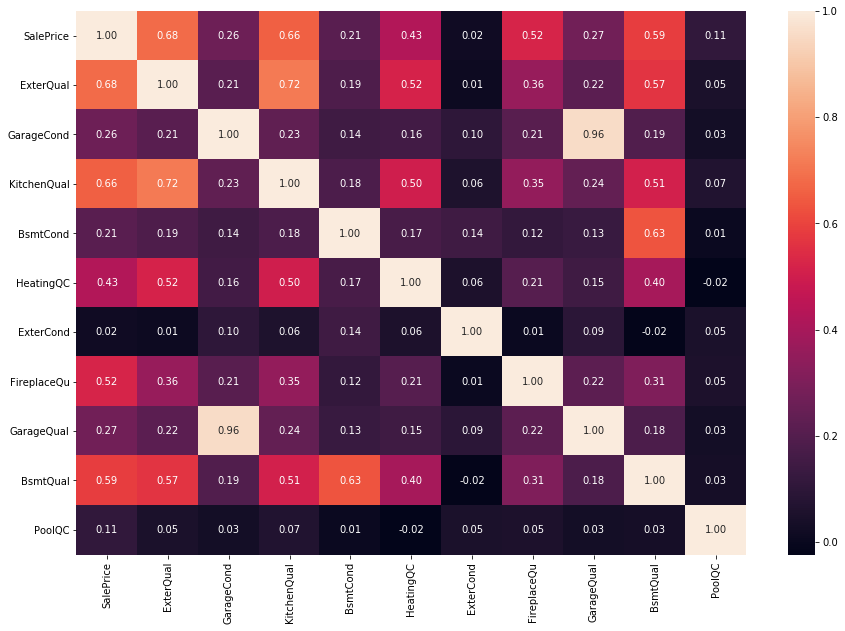

In [62]:
selected_features = corr_helper(features=new_num_features)

#### Categorical Features without a Natural Order

In [64]:
remaining_cat_features = get_features(df, "cat")
print("Remaining categorical features:")

remaining_cat_features

Remaining categorical features:


['Alley',
 'BldgType',
 'Condition1',
 'Condition2',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'Foundation',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LotConfig',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street']

##### sale price distribution for a few neighborhoods

In [65]:
def plot_helper(df, feature, limit=None, y_max=0.00002, height=4):
    labels = df[feature].unique()
    f, ax = plt.subplots(figsize=(15, height))
    
    if not limit:
        limit = len(labels)
        
    for label in labels[:limit]:
        sns.kdeplot(df[df_train[feature] == label]["SalePrice"], label=str(label))

    plt.yticks([0, y_max])

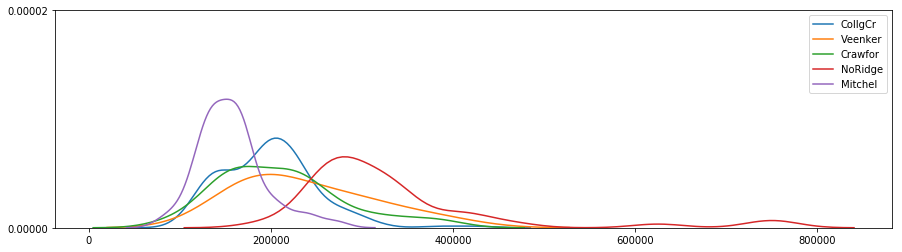

In [66]:
plot_helper(df_train, "Neighborhood", limit=5)

Prices in North Ridge are significantly higher on average than in Mitchell for example.

list of all neighborhoods and the average sale price for a house in this neighborhood.

In [67]:
# helper method to display the average price for the different values of a feature
def avg_price(feature):
    df_avg_price = df_train[[feature, "SalePrice"]].groupby(feature).mean().sort_values("SalePrice")
    df_avg_price["NumberOfHouses"] = df_train[[feature]].groupby(feature).size()
    return df_avg_price

In [68]:
avg_price_neighborhood = avg_price("Neighborhood")
print(avg_price_neighborhood)

                  SalePrice  NumberOfHouses
Neighborhood                               
MeadowV        98576.470588              17
IDOTRR        100123.783784              37
BrDale        104493.750000              16
BrkSide       124834.051724              58
Edwards       128219.700000             100
OldTown       128225.300885             113
Sawyer        136793.135135              74
Blueste       137500.000000               2
SWISU         142591.360000              25
NPkVill       142694.444444               9
NAmes         145847.080000             225
Mitchel       156270.122449              49
SawyerW       186555.796610              59
NWAmes        189050.068493              73
Gilbert       192854.506329              79
Blmngtn       194870.882353              17
CollgCr       197965.773333             150
Crawfor       210624.725490              51
ClearCr       212565.428571              28
Somerst       225379.837209              86
Veenker       238772.727273     

Northridge actually has the highest prices on average compared to all other neighborhoods.

If we want to use feature "Neighborhood" for a future model, it would make sense to group some of the neighborhoods before generating one-hot-encodings for this feature in order to reduce the dimensionality. Another way would be to assume an order on the neighborhoods based on the average sale price. This way, we can convert this feature the same way we did in the previous section.

In [69]:
neighborhood_dict = {}
for num, name in enumerate(avg_price_neighborhood.index):
    neighborhood_dict[name] = num
    
neighborhood_dict

{'Blmngtn': 15,
 'Blueste': 7,
 'BrDale': 2,
 'BrkSide': 3,
 'ClearCr': 18,
 'CollgCr': 16,
 'Crawfor': 17,
 'Edwards': 4,
 'Gilbert': 14,
 'IDOTRR': 1,
 'MeadowV': 0,
 'Mitchel': 11,
 'NAmes': 10,
 'NPkVill': 9,
 'NWAmes': 13,
 'NoRidge': 24,
 'NridgHt': 23,
 'OldTown': 5,
 'SWISU': 8,
 'Sawyer': 6,
 'SawyerW': 12,
 'Somerst': 19,
 'StoneBr': 22,
 'Timber': 21,
 'Veenker': 20}

In [70]:
make_numerical("Neighborhood", neighborhood_dict)

In [71]:
df["FencePrivacy"] = df["Fence"]
df["FenceWood"] = df["Fence"]

df.drop("Fence", axis=1, inplace=True)

make_numerical("FencePrivacy", {"GdPrv": 2, "MnPrv": 1, "GdWo": 0, "MnWw": 0, "None": 0})
make_numerical("FenceWood", {"GdPrv": 0, "MnPrv": 0, "GdWo": 2, "MnWw": 1, "None": 0})
print("Created features 'FencePrivacy' and 'FenceWood' and removed feature 'Fence'.")

Created features 'FencePrivacy' and 'FenceWood' and removed feature 'Fence'.


In [72]:
print("We currently have {} numerical features.".format(len(get_features(df, "num"))))

We currently have 10 numerical features.


In [73]:
remaining_cat_features = get_features(df, "cat")
print("We have {} unused features that can be one-hot-encoded:".format(len(remaining_cat_features)))

remaining_cat_features

We have 21 unused features that can be one-hot-encoded:


['Alley',
 'BldgType',
 'Condition1',
 'Condition2',
 'Electrical',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LotConfig',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street']

In [75]:
# We will keep track of all one-hot-encoded features in a list so that we can remove them at the end.

encoded_features = set()

In [76]:
count = 0

for f in remaining_cat_features:
    len_uniques = len(pd.get_dummies(df[f]).columns)
    count += len_uniques
    print("One-hot-encoding of feature '{}' would generate {} new features".format(f, len_uniques))
    
print("")
print("Total number of potentially generated features: {}".format(count))

One-hot-encoding of feature 'Alley' would generate 3 new features
One-hot-encoding of feature 'BldgType' would generate 5 new features
One-hot-encoding of feature 'Condition1' would generate 9 new features
One-hot-encoding of feature 'Condition2' would generate 8 new features
One-hot-encoding of feature 'Electrical' would generate 5 new features
One-hot-encoding of feature 'Exterior1st' would generate 16 new features
One-hot-encoding of feature 'Exterior2nd' would generate 16 new features
One-hot-encoding of feature 'Foundation' would generate 6 new features
One-hot-encoding of feature 'GarageType' would generate 7 new features
One-hot-encoding of feature 'Heating' would generate 6 new features
One-hot-encoding of feature 'HouseStyle' would generate 8 new features
One-hot-encoding of feature 'LandContour' would generate 4 new features
One-hot-encoding of feature 'LotConfig' would generate 5 new features
One-hot-encoding of feature 'MSZoning' would generate 6 new features
One-hot-encodi

We can actually bring this number down a bit. In my opinion, it makes sense to create combined one-hot-encodings for the feature pairs ('Condition1', 'Condition2') and ('Exterior1st', 'Exterior2nd').

There are some misspellings in 'Exterior1st' and 'Exterior2nd'. We should correct those before encoding the features.

In [77]:
print(df["Exterior1st"].unique())
print(df["Exterior2nd"].unique())

df[["Exterior1st", "Exterior2nd"]] = df[["Exterior1st", "Exterior2nd"]].replace("Wd Shng", "WdShing")
df[["Exterior1st", "Exterior2nd"]] = df[["Exterior1st", "Exterior2nd"]].replace("Brk Cmn", "BrkComm")
df[["Exterior1st", "Exterior2nd"]] = df[["Exterior1st", "Exterior2nd"]].replace("CemntBd", "CmentBd")

print("")
print("Corrected misspellings.")
same_values = set(df["Exterior1st"].unique()) == set(df["Exterior2nd"].unique())
print("'Exterior1st' and 'Exterior2nd' have the same values: {}".format(same_values))

['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock' 'Other']
['VinylSd' 'MetalSd' 'Wd Shng' 'HdBoard' 'Plywood' 'Wd Sdng' 'CmentBd'
 'BrkFace' 'Stucco' 'AsbShng' 'Brk Cmn' 'ImStucc' 'AsphShn' 'Stone'
 'Other' 'CBlock']

Corrected misspellings.
'Exterior1st' and 'Exterior2nd' have the same values: True


In [78]:
# helper method to create one-hot-encodings of features.
def one_hot_encode(df, features, prefix=None):   
    global encoded_features
    if not isinstance(features, list):
        features = [features]
    
    if not set(features) <= set(df.columns.values):
        print("Not all features are columns in data frame.")
        return None
    
    dummies = pd.get_dummies(df[features[0]], prefix=prefix).columns.values
    df_dummies = pd.DataFrame(0, index=df.index, columns=dummies)
    df[dummies] = df_dummies
    
    for f in features:
        df[dummies] = df[dummies] + pd.get_dummies(df[f], prefix=prefix)
        
    df[dummies] = df[dummies].apply(lambda x: x > 0).astype(int)
    encoded_features = encoded_features | set(features)
    return list(dummies)

In [79]:
print("Created combined one-hot-encoding for 'Condition1' and 'Condition2'. New features:")
print(one_hot_encode(df, ["Condition1", "Condition2"], "Condition"))

Created combined one-hot-encoding for 'Condition1' and 'Condition2'. New features:
['Condition_Artery', 'Condition_Feedr', 'Condition_Norm', 'Condition_PosA', 'Condition_PosN', 'Condition_RRAe', 'Condition_RRAn', 'Condition_RRNe', 'Condition_RRNn']


In [80]:
print("Created combined one-hot-encoding for 'Exterior1st' and 'Exterior2nd'. New features:")
print(one_hot_encode(df, ["Exterior1st", "Exterior2nd"], "Exterior"))

Created combined one-hot-encoding for 'Exterior1st' and 'Exterior2nd'. New features:
['Exterior_AsbShng', 'Exterior_AsphShn', 'Exterior_BrkComm', 'Exterior_BrkFace', 'Exterior_CBlock', 'Exterior_CmentBd', 'Exterior_HdBoard', 'Exterior_ImStucc', 'Exterior_MetalSd', 'Exterior_Other', 'Exterior_Plywood', 'Exterior_Stone', 'Exterior_Stucco', 'Exterior_VinylSd', 'Exterior_Wd Sdng', 'Exterior_WdShing']


In [81]:
remaining_cat_features = [x for x in remaining_cat_features if x not in encoded_features]
remaining_cat_features

['Alley',
 'BldgType',
 'Electrical',
 'Foundation',
 'GarageType',
 'Heating',
 'HouseStyle',
 'LandContour',
 'LotConfig',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street']

In [82]:
new_features = []

for feature in remaining_cat_features:
    features = one_hot_encode(df, feature, prefix=feature)        
    new_features = new_features + features
    
print("Generated {} new features.".format(len(new_features)))

Generated 95 new features.


Here is another correlation matrix of the newly generated features that have an absolute correlation of at least 0.2 to 'SalePrice'.

In [83]:
update_dfs(df)

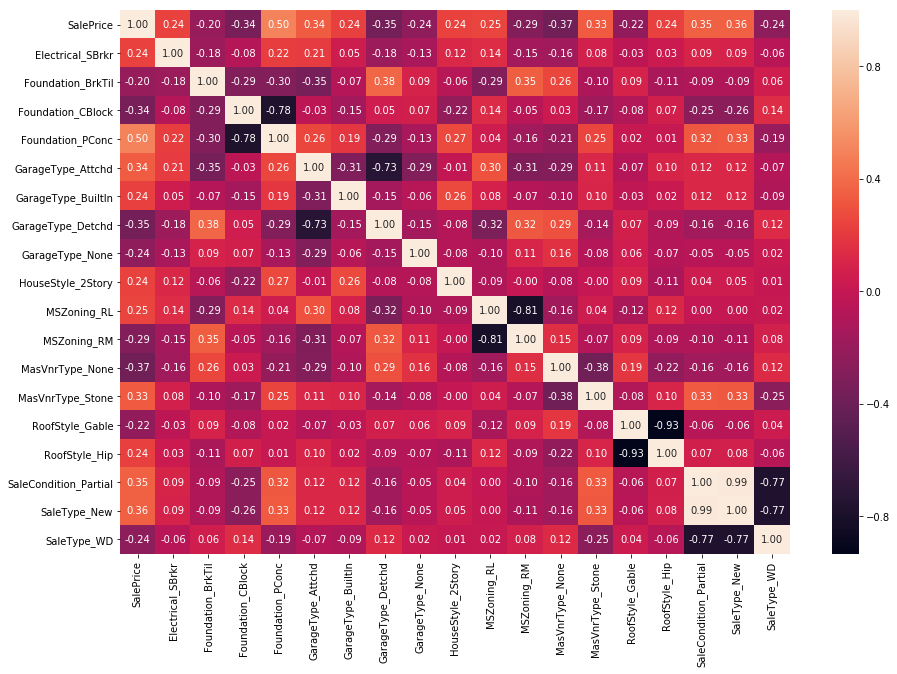

In [84]:
one_hot_enc_20_percent_corr = corr_helper(new_features, min_corr=0.2)

##### Adding new features

Let's try to come up with completely new features by combining some of the available features. 

I can imagine that the average room size of a house might have an impact on its sale price.

In [85]:
df["AvgRoomSize"] = df["GrLivArea"] / df["TotRmsAbvGrd"]
print("Created feature 'AvgRoomSize'.")

Created feature 'AvgRoomSize'.


In [86]:
# Another feature that might be interesting are the sums of all condition and quality ratings.

ratings_qual = ["OverallQual", "ExterQual", "BsmtQual", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageQual",
               "PoolQC"]
ratings_cond = ["OverallCond", "ExterCond", "BsmtCond", "HeatingQC", "GarageCond"]

df["SumQualCond"] = 0

for item in ratings_qual + ratings_cond:
    df["SumQualCond"] = df["SumQualCond"] + df[item]

In [87]:
final_features = get_features(df, "num")
print("There are {} numerical features.".format(len(final_features)))

# we only want the final features in the data for our final model
update_dfs(df, final_features)

print("There are {} rows in df_train.".format(len(df_train)))
print("There are {} rows in df_test.".format(len(df_test)))

There are 131 numerical features.
There are 1460 rows in df_train.
There are 1459 rows in df_test.


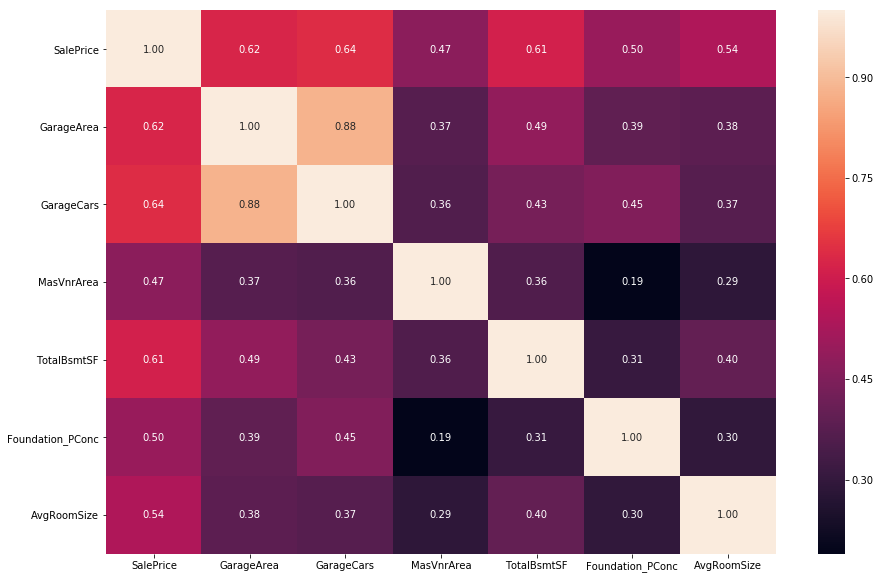

In [88]:
features_40_percent_sale_price_corr = corr_helper(min_corr=0.4)

## V. Developing a Sophisticated Regression Model

Just for comparison, let's see how a simple linear regression model performs with the features that we created in the previous sections.

In [89]:
model_eval_helper(final_features, model=LinearRegression())


Using 146 samples (10.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.27812594413180775
Root mean squared logs error on training data: 0.11199045068260856

Using 584 samples (40.0%) of train.csv for training.
Root mean squared logs error on validation data: 141815117.90695694
Root mean squared logs error on training data: 0.15304960038708298

Using 1021 samples (70.0%) of train.csv for training.
Root mean squared logs error on validation data: 627316.951483093
Root mean squared logs error on training data: 0.15729308342548157

Using 1460 samples (100.0%) of train.csv for training.
Root mean squared logs error on validation data: 10776152.334908001
Root mean squared logs error on training data: 0.1565091862465951


In [90]:
print("Training linear regression model with features:")
print(features_40_percent_sale_price_corr)
model_eval_helper(features_40_percent_sale_price_corr, LinearRegression())

Training linear regression model with features:
['GarageArea', 'GarageCars', 'MasVnrArea', 'TotalBsmtSF', 'Foundation_PConc', 'AvgRoomSize']

Using 146 samples (10.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.25435851077821126
Root mean squared logs error on training data: 0.17895917264683794

Using 584 samples (40.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.2507223475845098
Root mean squared logs error on training data: 0.2301486445127275

Using 1021 samples (70.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.2515714844088016
Root mean squared logs error on training data: 0.22372029759236384

Using 1460 samples (100.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.25250416321168945
Root mean squared logs error on training data: 0.2186351345015748


Again, we should have scaled our data before we trained our linear regression model. But since we won't use linear regression models from now on, we will skip scaling the data.

### GradientBoostingRegressor

Now we'll use a more GradientBoostingRegressor as a more sophisticated model. Ensemble methods like GradientBoostingRegressor usually perform extremely good in Kaggle competitions. Further, we don't have to worry about feature scaling and having too many features.

In [92]:
from sklearn.ensemble import GradientBoostingRegressor

In [93]:
reg = GradientBoostingRegressor(n_estimators=200, max_depth=2)
reg

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [94]:
model_eval_helper(final_features, model=reg)


Using 146 samples (10.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.20718506897403255
Root mean squared logs error on training data: 0.04948765610782898

Using 584 samples (40.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.18551010995644737
Root mean squared logs error on training data: 0.11263817872530348

Using 1021 samples (70.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.17932886425696398
Root mean squared logs error on training data: 0.12787913564366246

Using 1460 samples (100.0%) of train.csv for training.
Root mean squared logs error on validation data: 0.18325415871580622
Root mean squared logs error on training data: 0.12904595193463977


In [95]:
df_importances = pd.DataFrame(reg.feature_importances_, index=final_features, columns=["Importance"])
df_importances.sort_values("Importance", ascending=False, inplace=True)

print(df_importances)

                       Importance
AvgRoomSize              0.093370
TotalBsmtSF              0.078190
GarageArea               0.073167
BsmtUnfSF                0.053832
BsmtFinSF1               0.052255
HouseStyle_1Story        0.044869
LotFrontage              0.031043
MSZoning_C (all)         0.029334
BldgType_1Fam            0.027427
MasVnrArea               0.023599
GarageCars               0.022457
GarageType_2Types        0.018192
MSZoning_RM              0.017745
Exterior_BrkComm         0.017716
Exterior_BrkFace         0.015969
GarageType_BuiltIn       0.015580
SaleCondition_Abnorml    0.015569
HouseStyle_2.5Unf        0.015462
HouseStyle_2.5Fin        0.015312
Heating_Grav             0.015142
HouseStyle_2Story        0.013667
Foundation_PConc         0.012905
RoofMatl_CompShg         0.012559
Condition_Artery         0.012460
RoofStyle_Gable          0.011772
Electrical_FuseF         0.010868
BsmtFinSF2               0.010708
Condition_Norm           0.010596
Exterior_AsbSh

Both in and out of sample error went down dramatically. And interestingly, 'GrLivArea' actually seems to be the most important feature for predicting the sale price. 

There are a few features that are completely useless for our model.

In [96]:
useful_features = df_importances[df_importances["Importance"] > 0].index.values
print("{} of {} features had an importance greater than 0.0 for GradientBoostingRegressor:".format(
    len(useful_features), len(df_train.columns)))
print(useful_features)

75 of 132 features had an importance greater than 0.0 for GradientBoostingRegressor:
['AvgRoomSize' 'TotalBsmtSF' 'GarageArea' 'BsmtUnfSF' 'BsmtFinSF1'
 'HouseStyle_1Story' 'LotFrontage' 'MSZoning_C (all)' 'BldgType_1Fam'
 'MasVnrArea' 'GarageCars' 'GarageType_2Types' 'MSZoning_RM'
 'Exterior_BrkComm' 'Exterior_BrkFace' 'GarageType_BuiltIn'
 'SaleCondition_Abnorml' 'HouseStyle_2.5Unf' 'HouseStyle_2.5Fin'
 'Heating_Grav' 'HouseStyle_2Story' 'Foundation_PConc' 'RoofMatl_CompShg'
 'Condition_Artery' 'RoofStyle_Gable' 'Electrical_FuseF' 'BsmtFinSF2'
 'Condition_Norm' 'Exterior_AsbShng' 'SaleType_New' 'MasVnrType_Stone'
 'LandContour_Lvl' 'Exterior_CmentBd' 'GarageType_CarPort'
 'Exterior_CBlock' 'Exterior_HdBoard' 'SaleCondition_Alloca'
 'LotConfig_CulDSac' 'Alley_Pave' 'Exterior_ImStucc' 'Alley_Grvl'
 'BsmtFullBath' 'Exterior_Stucco' 'MSZoning_FV' 'Exterior_Stone'
 'LandContour_Bnk' 'Electrical_SBrkr' 'Condition_Feedr' 'LandContour_Low'
 'Exterior_MetalSd' 'GarageType_Detchd' 'Foundation_

In [97]:
print("")
useless_features = df_importances[df_importances["Importance"] == 0].index.values
print("The following features had importance 0.0 for GradientBoostingRegressor:")
print(useless_features)


The following features had importance 0.0 for GradientBoostingRegressor:
['RoofMatl_Roll' 'RoofMatl_WdShake' 'RoofMatl_Metal' 'RoofMatl_Membran'
 'RoofMatl_ClyTile' 'SaleCondition_Family' 'RoofStyle_Flat'
 'RoofStyle_Mansard' 'RoofStyle_Shed' 'SaleCondition_AdjLand'
 'MiscFeature_Shed' 'SaleCondition_Partial' 'SaleType_COD' 'SaleType_Con'
 'SaleType_ConLD' 'SaleType_ConLI' 'SaleType_ConLw' 'SaleType_Oth'
 'SaleType_WD' 'Street_Grvl' 'Street_Pave' 'MiscFeature_TenC'
 'HouseStyle_1.5Unf' 'MiscFeature_Othr' 'Foundation_Stone'
 'Condition_RRAn' 'Condition_RRNe' 'Condition_RRNn' 'Exterior_AsphShn'
 'Exterior_Other' 'Exterior_WdShing' 'Alley_None' 'BldgType_2fmCon'
 'BldgType_Duplex' 'BldgType_Twnhs' 'Electrical_FuseA' 'Electrical_FuseP'
 'Foundation_BrkTil' 'Foundation_Slab' 'Foundation_Wood'
 'MiscFeature_None' 'GarageType_Basment' 'GarageType_None' 'Heating_Floor'
 'Heating_GasA' 'Heating_GasW' 'Heating_Wall' 'HouseStyle_SLvl'
 'LotConfig_Corner' 'LotConfig_FR2' 'LotConfig_FR3' 'MSZoning

### Parameter Tuning

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [99]:
param_grid = [{"max_depth": [2, 3],
               "n_estimators": [300, 500, 750],
               "max_features": ["sqrt", "auto"]}]
param_grid

[{'max_depth': [2, 3],
  'max_features': ['sqrt', 'auto'],
  'n_estimators': [300, 500, 750]}]

In [100]:
cv = ShuffleSplit(n_splits=3, test_size=0.1, random_state=0)
cv

ShuffleSplit(n_splits=3, random_state=0, test_size=0.1, train_size=None)

In [101]:
model = GradientBoostingRegressor(random_state=0)
model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False)

In [102]:
grid_search = GridSearchCV(model, param_grid, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search

GridSearchCV(cv=ShuffleSplit(n_splits=3, random_state=0, test_size=0.1, train_size=None),
       error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=0,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'max_depth': [2, 3], 'n_estimators': [300, 500, 750], 'max_features': ['sqrt', 'auto']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [103]:
X_train = df_train.drop("SalePrice", axis=1).values
y_train = np.ravel(df_train[["SalePrice"]].apply(np.log).values)

X_train, y_train

(array([[7.06000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 2.13750000e+02],
        [9.78000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 2.10333333e+02],
        [4.86000000e+02, 0.00000000e+00, 1.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 2.97666667e+02],
        ...,
        [2.75000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 2.60000000e+02],
        [4.90000000e+01, 1.02900000e+03, 1.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 2.15600000e+02],
        [8.30000000e+02, 2.90000000e+02, 1.00000000e+00, ...,
         0.00000000e+00, 1.00000000e+00, 2.09333333e+02]]),
 array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
        11.86446223, 11.90158345]))

In [104]:
print("Training models...")
grid_search.fit(X_train, y_train)
print("Finished training models.")

Training models...
Finished training models.


In [105]:
print("Best estimator:")
print(grid_search.best_estimator_)

rmse = np.sqrt(np.abs(grid_search.best_score_))
print("Best estimator score: {}".format(rmse))

Best estimator:
GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=750,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)
Best estimator score: 0.16807837801887976


### Predictions

In [106]:
best_model = grid_search.best_estimator_
best_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=750,
             presort='auto', random_state=0, subsample=1.0, verbose=0,
             warm_start=False)

In [109]:
X_predict = df_test.values
X_predict

array([[4.68000000e+02, 1.44000000e+02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.79200000e+02],
       [9.23000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.21500000e+02],
       [7.91000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.71500000e+02],
       ...,
       [1.22400000e+03, 0.00000000e+00, 1.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.74857143e+02],
       [3.37000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.61666667e+02],
       [7.58000000e+02, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.22222222e+02]])

In [110]:
y_predict = best_model.predict(X_predict)
y_predict

array([11.85107667, 12.05299402, 12.21741343, ..., 11.95892117,
       11.62883606, 12.26996035])

In [111]:
# rescale back from logarithmic price range.
y_predict = np.exp(y_predict)
y_predict

array([140235.25265171, 171612.45026198, 202281.06782801, ...,
       156204.4758859 , 112289.54712374, 213194.53814371])

In [112]:
df_pred = pd.DataFrame(y_predict, index=df_test.index, columns=["SalePrice"])
df_pred.to_csv("predictions.csv")

print("Created predictions. Showing five sample rows of 'predictions.csv':")
print(df_pred.head())

Created predictions. Showing five sample rows of 'predictions.csv':
          SalePrice
Id                 
1461  140235.252652
1462  171612.450262
1463  202281.067828
1464  199009.835787
1465  187328.358019
